In [2]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 画像の読み込み
image = cv2.imread("pouch\\differential\\20241130_101421.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
# ガウシアンフィルターを適用してノイズを削除
kernel_size = 5                                                         # カーネルサイズの設定
sigma = 0                                                               # sigmaの設定
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)    # ガウシアンフィルターの適用

# ラプラシアン フィルターを適用
laplacian_8U_k3 = cv2.Laplacian(blurred, cv2.CV_8U, ksize=3)
laplacian_8U_k5 = cv2.Laplacian(blurred, cv2.CV_8U, ksize=5)
laplacian_32F_k3 = cv2.Laplacian(blurred, cv2.CV_32F, ksize=3)
laplacian_32F_k5 = cv2.Laplacian(blurred, cv2.CV_32F, ksize=5)
# データ型をcv2.CV_32F(float32)からcv2.CV_8U(uint8)に変換
laplacian_32F_k3 = np.clip(laplacian_32F_k3 * 255, a_min = 0, a_max = 255).astype(np.uint8)
laplacian_32F_k5 = np.clip(laplacian_32F_k5 * 255, a_min = 0, a_max = 255).astype(np.uint8)

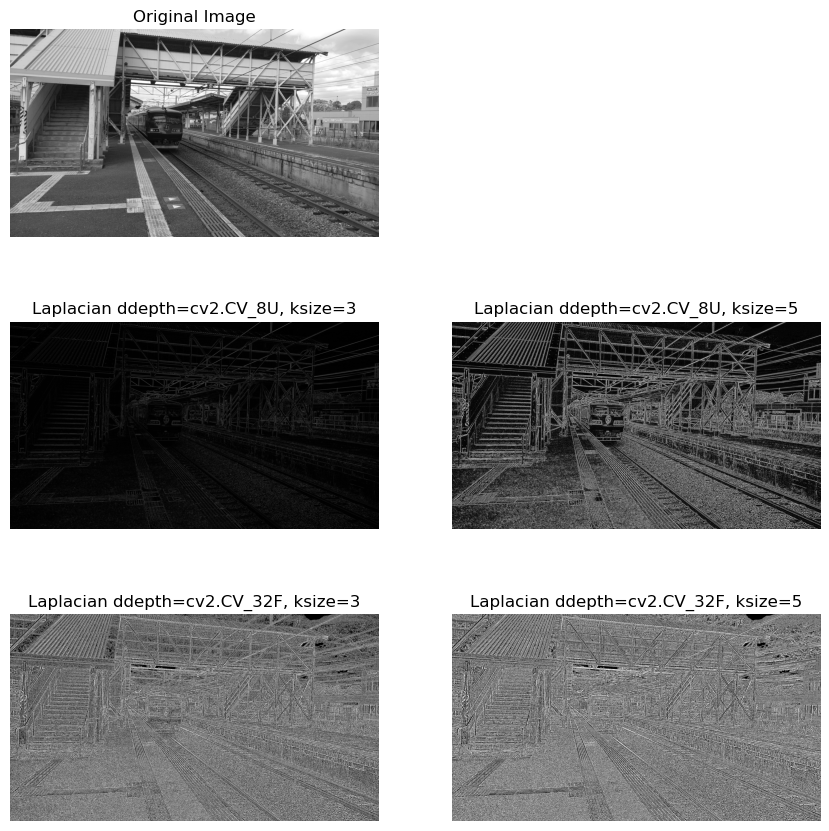

In [5]:
# 絶対値を取得
laplacian_8U_k3 = cv2.convertScaleAbs(laplacian_8U_k3)
laplacian_8U_k5 = cv2.convertScaleAbs(laplacian_8U_k5)
laplacian_32F_k3 = cv2.convertScaleAbs(laplacian_32F_k3)
laplacian_32F_k5 = cv2.convertScaleAbs(laplacian_32F_k5)

# 画像とエッジ画像を表示
plt.rcParams["figure.figsize"] = [9,9]                                  # ウィンドウサイズを設定
title = "cv2.Laplacian: codevace.com"
plt.figure(title)                                                       # ウィンドウタイトルを設定
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.03, top=0.95)       # 余白を設定
plt.subplot(321)                                                        # 3行2列の1番目の領域にプロットを設定
plt.imshow(image, cmap='gray')                                          # 入力画像をグレースケールで表示
plt.title('Original Image')                                             # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す
plt.subplot(323)                                                        # 3行2列の3番目の領域にプロットを設定
plt.imshow(laplacian_8U_k3, cmap='gray')                                # ddepth=cv2.CV_8U, ksize=3の結果
plt.title('Laplacian ddepth=cv2.CV_8U, ksize=3')                        # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す
plt.subplot(324)                                                        # 3行2列の4番目の領域にプロットを設定
plt.imshow(laplacian_8U_k5, cmap='gray')                                # ddepth=cv2.CV_8U, ksize=5の結果
plt.title('Laplacian ddepth=cv2.CV_8U, ksize=5')                        # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す
plt.subplot(325)                                                        # 3行2列の5番目の領域にプロットを設定
plt.imshow(laplacian_32F_k3, cmap='gray')                               # ddepth=cv2.CV_32F, ksize=3の結果
plt.title('Laplacian ddepth=cv2.CV_32F, ksize=3')                       # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す
plt.subplot(326)                                                        # 3行2列の6番目の領域にプロットを設定
plt.imshow(laplacian_32F_k5, cmap='gray')                               # ddepth=cv2.CV_32F, ksize=5の結果
plt.title('Laplacian ddepth=cv2.CV_32F, ksize=5')                       # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す
plt.show()